In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/netflix_titles.csv")

# Show basic info
print("Initial shape:", df.shape)
df.head()

Initial shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Dataset overview
print("📌 Shape of the dataset:", df_clean.shape)
print("\n🧾 Dataset Info:")
print(df_clean.info())
print("\n🔍 Null value count:")
print(df_clean.isnull().sum())

📌 Shape of the dataset: (7967, 15)

🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7967 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7967 non-null   object        
 1   type          7967 non-null   object        
 2   title         7967 non-null   object        
 3   director      5751 non-null   object        
 4   cast          7296 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    7967 non-null   datetime64[ns]
 7   release_year  7967 non-null   int64         
 8   rating        7964 non-null   object        
 9   duration      7964 non-null   object        
 10  listed_in     7967 non-null   object        
 11  description   7967 non-null   object        
 12  year_added    7967 non-null   int32         
 13  month_added   7967 non-null   int32         
 14  main_country  7967 non-null   object     

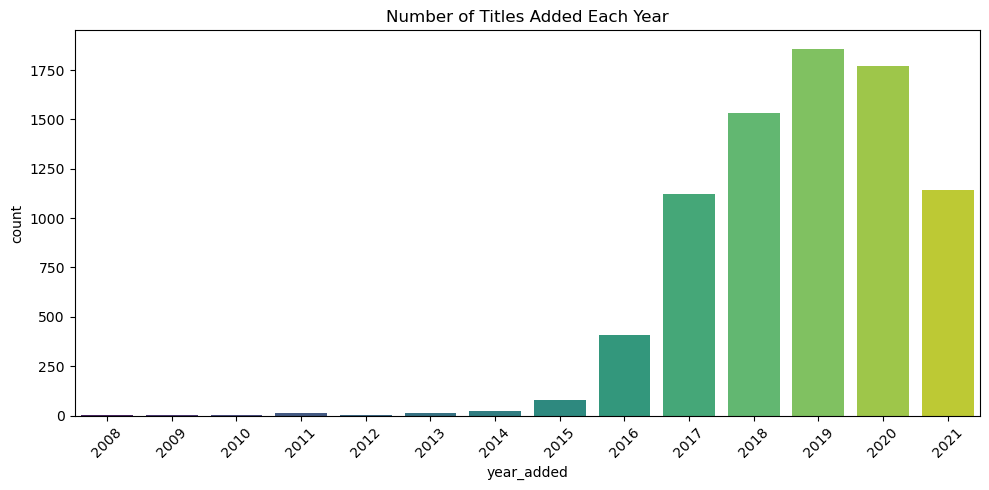

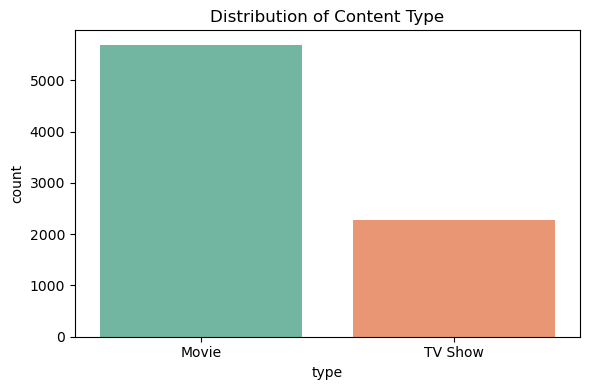

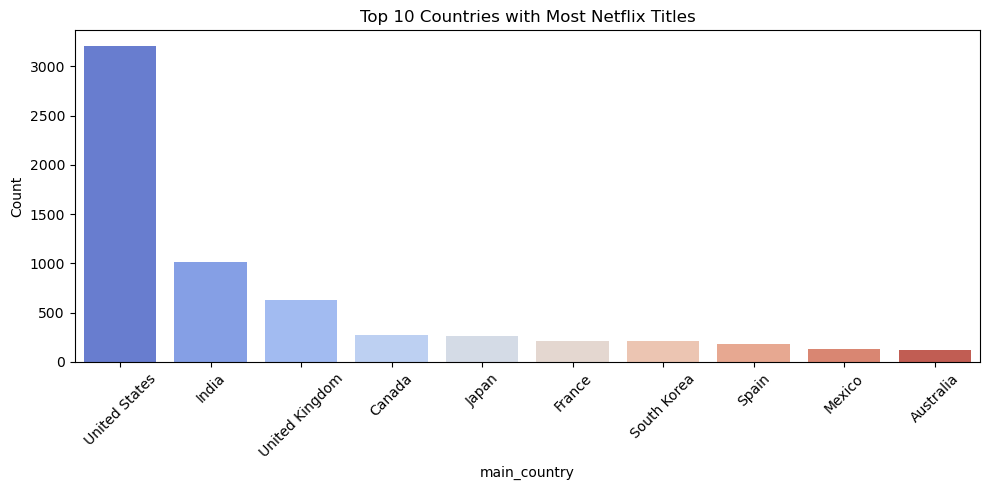

In [12]:
# Drop rows with missing 'date_added' or 'country'
df_clean = df.dropna(subset=['date_added', 'country']).copy()

# Strip and convert date_added column
df_clean['date_added'] = df_clean['date_added'].str.strip()
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

# Drop rows where date conversion failed
df_clean = df_clean.dropna(subset=['date_added'])

# Extract year and month
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month

# Extract main country
df_clean['main_country'] = df_clean['country'].apply(lambda x: x.split(",")[0].strip())

# 1. Count of content by year
plt.figure(figsize=(10,5))
sns.countplot(data=df_clean, x='year_added', palette='viridis')
plt.title('Number of Titles Added Each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Content type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.tight_layout()
plt.show()

# 3. Top 10 countries with most content
top_countries = df_clean['main_country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()